# Decision tree
**Important**: Change the kernel to *PROJECT_NAME local*. You can do this from the *Kernel* menu under *Change kernel*.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV
import pickle
import os
import scipy.stats as st
from itertools import combinations

In [2]:
from azureml.logging import get_azureml_logger
run_logger = get_azureml_logger()
run_logger.log('amlrealworld.timeseries.dtree','true')

In [3]:
model_name = "dtree"
aml_dir = os.environ['AZUREML_NATIVE_SHARE_DIRECTORY']
train = pd.read_csv(os.path.join(aml_dir, 'nyc_demand_train.csv'), parse_dates=['timeStamp'])

Using randomised search to find optimal hyperparameters

In [4]:
X = train.drop(['demand', 'timeStamp'], axis=1)

In [5]:
regr = DecisionTreeRegressor()
tscv = TimeSeriesSplit(n_splits=3)

In [6]:
param_dist = {'max_depth': st.randint(2, 20),
              'min_samples_split': st.randint(2, 50),
              'min_samples_leaf': st.randint(1, 100),
              'max_features': range(3,X.shape[1]+1)
             }
regr_cv = RandomizedSearchCV(estimator=regr,
            param_distributions=param_dist,
            n_iter=100,
            cv=tscv,
            iid=False,
            scoring='neg_mean_squared_error',
            verbose=2,
            n_jobs=-1)
regr_pipe = Pipeline([('regr_cv', regr_cv)])
regr_pipe.fit(X, y=train['demand'])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] max_features=14, min_samples_split=13, min_samples_leaf=14, max_depth=16 
[CV] max_features=14, min_samples_split=13, min_samples_leaf=14, max_depth=16 
[CV]  max_features=14, min_samples_split=13, min_samples_leaf=14, max_depth=16, total=   0.2s
[CV] max_features=14, min_samples_split=13, min_samples_leaf=14, max_depth=16 
[CV]  max_features=14, min_samples_split=13, min_samples_leaf=14, max_depth=16, total=   0.3s
[CV] max_features=7, min_samples_split=43, min_samples_leaf=73, max_depth=14 
[CV]  max_features=7, min_samples_split=43, min_samples_leaf=73, max_depth=14, total=   0.1s
[CV] max_features=7, min_samples_split=43, min_samples_leaf=73, max_depth=14 
[CV]  max_features=7, min_samples_split=43, min_samples_leaf=73, max_depth=14, total=   0.1s
[CV] max_features=7, min_samples_split=43, min_samples_leaf=73, max_depth=14 
[CV]  max_features=14, min_samples_split=13, min_samples_leaf=14, max_depth=16, total=   0.5

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.5s


[CV] max_features=10, min_samples_split=32, min_samples_leaf=85, max_depth=17 
[CV]  max_features=10, min_samples_split=32, min_samples_leaf=85, max_depth=17, total=   0.1s
[CV] max_features=10, min_samples_split=32, min_samples_leaf=85, max_depth=17 
[CV]  max_features=10, min_samples_split=32, min_samples_leaf=85, max_depth=17, total=   0.3s
[CV] max_features=12, min_samples_split=6, min_samples_leaf=57, max_depth=15 
[CV]  max_features=12, min_samples_split=6, min_samples_leaf=57, max_depth=15, total=   0.1s
[CV] max_features=12, min_samples_split=6, min_samples_leaf=57, max_depth=15 
[CV]  max_features=10, min_samples_split=32, min_samples_leaf=85, max_depth=17, total=   0.4s
[CV] max_features=12, min_samples_split=6, min_samples_leaf=57, max_depth=15 
[CV]  max_features=12, min_samples_split=6, min_samples_leaf=57, max_depth=15, total=   0.2s
[CV] max_features=17, min_samples_split=34, min_samples_leaf=10, max_depth=15 
[CV]  max_features=17, min_samples_split=34, min_samples_leaf

[CV]  max_features=8, min_samples_split=40, min_samples_leaf=11, max_depth=13, total=   0.4s
[CV] max_features=3, min_samples_split=23, min_samples_leaf=59, max_depth=14 
[CV]  max_features=3, min_samples_split=23, min_samples_leaf=59, max_depth=14, total=   0.1s
[CV] max_features=16, min_samples_split=31, min_samples_leaf=57, max_depth=17 
[CV]  max_features=3, min_samples_split=23, min_samples_leaf=59, max_depth=14, total=   0.1s
[CV] max_features=16, min_samples_split=31, min_samples_leaf=57, max_depth=17 
[CV]  max_features=16, min_samples_split=31, min_samples_leaf=57, max_depth=17, total=   0.1s
[CV] max_features=16, min_samples_split=31, min_samples_leaf=57, max_depth=17 
[CV]  max_features=16, min_samples_split=31, min_samples_leaf=57, max_depth=17, total=   0.2s
[CV] max_features=13, min_samples_split=41, min_samples_leaf=40, max_depth=17 
[CV]  max_features=13, min_samples_split=41, min_samples_leaf=40, max_depth=17, total=   0.1s
[CV] max_features=13, min_samples_split=41, m

[CV]  max_features=3, min_samples_split=16, min_samples_leaf=18, max_depth=3, total=   0.0s
[CV] max_features=3, min_samples_split=16, min_samples_leaf=18, max_depth=3 
[CV]  max_features=3, min_samples_split=16, min_samples_leaf=18, max_depth=3, total=   0.0s
[CV] max_features=17, min_samples_split=33, min_samples_leaf=36, max_depth=19 
[CV]  max_features=17, min_samples_split=28, min_samples_leaf=63, max_depth=3, total=   0.2s
[CV] max_features=17, min_samples_split=33, min_samples_leaf=36, max_depth=19 
[CV]  max_features=17, min_samples_split=33, min_samples_leaf=36, max_depth=19, total=   0.1s
[CV] max_features=17, min_samples_split=33, min_samples_leaf=36, max_depth=19 
[CV]  max_features=17, min_samples_split=33, min_samples_leaf=36, max_depth=19, total=   0.3s
[CV] max_features=4, min_samples_split=6, min_samples_leaf=52, max_depth=14 
[CV]  max_features=4, min_samples_split=6, min_samples_leaf=52, max_depth=14, total=   0.1s
[CV] max_features=4, min_samples_split=6, min_sample

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   17.4s


[CV]  max_features=16, min_samples_split=33, min_samples_leaf=12, max_depth=10, total=   0.3s
[CV] max_features=6, min_samples_split=31, min_samples_leaf=41, max_depth=6 
[CV]  max_features=6, min_samples_split=31, min_samples_leaf=41, max_depth=6, total=   0.0s
[CV] max_features=6, min_samples_split=31, min_samples_leaf=41, max_depth=6 
[CV]  max_features=6, min_samples_split=31, min_samples_leaf=41, max_depth=6, total=   0.1s
[CV] max_features=6, min_samples_split=31, min_samples_leaf=41, max_depth=6 
[CV]  max_features=16, min_samples_split=33, min_samples_leaf=12, max_depth=10, total=   0.5s
[CV] max_features=4, min_samples_split=49, min_samples_leaf=97, max_depth=3 
[CV]  max_features=6, min_samples_split=31, min_samples_leaf=41, max_depth=6, total=   0.2s
[CV] max_features=4, min_samples_split=49, min_samples_leaf=97, max_depth=3 
[CV]  max_features=4, min_samples_split=49, min_samples_leaf=97, max_depth=3, total=   0.1s
[CV] max_features=4, min_samples_split=49, min_samples_leaf

[CV]  max_features=17, min_samples_split=46, min_samples_leaf=82, max_depth=19, total=   0.2s
[CV] max_features=10, min_samples_split=10, min_samples_leaf=57, max_depth=18 
[CV]  max_features=10, min_samples_split=10, min_samples_leaf=57, max_depth=18, total=   0.1s
[CV] max_features=10, min_samples_split=10, min_samples_leaf=57, max_depth=18 
[CV]  max_features=17, min_samples_split=46, min_samples_leaf=82, max_depth=19, total=   0.4s
[CV] max_features=10, min_samples_split=10, min_samples_leaf=57, max_depth=18 
[CV]  max_features=10, min_samples_split=10, min_samples_leaf=57, max_depth=18, total=   0.2s
[CV] max_features=4, min_samples_split=8, min_samples_leaf=67, max_depth=9 
[CV]  max_features=4, min_samples_split=8, min_samples_leaf=67, max_depth=9, total=   0.0s
[CV] max_features=4, min_samples_split=8, min_samples_leaf=67, max_depth=9 
[CV]  max_features=4, min_samples_split=8, min_samples_leaf=67, max_depth=9, total=   0.1s
[CV] max_features=4, min_samples_split=8, min_samples

[CV] max_features=9, min_samples_split=28, min_samples_leaf=20, max_depth=9 
[CV]  max_features=8, min_samples_split=37, min_samples_leaf=69, max_depth=4, total=   0.1s
[CV] max_features=9, min_samples_split=28, min_samples_leaf=20, max_depth=9 
[CV]  max_features=9, min_samples_split=28, min_samples_leaf=20, max_depth=9, total=   0.1s
[CV] max_features=9, min_samples_split=28, min_samples_leaf=20, max_depth=9 
[CV]  max_features=9, min_samples_split=28, min_samples_leaf=20, max_depth=9, total=   0.2s
[CV] max_features=10, min_samples_split=41, min_samples_leaf=61, max_depth=9 
[CV]  max_features=10, min_samples_split=41, min_samples_leaf=61, max_depth=9, total=   0.1s
[CV] max_features=10, min_samples_split=41, min_samples_leaf=61, max_depth=9 
[CV]  max_features=9, min_samples_split=28, min_samples_leaf=20, max_depth=9, total=   0.3s
[CV] max_features=10, min_samples_split=41, min_samples_leaf=61, max_depth=9 
[CV]  max_features=10, min_samples_split=41, min_samples_leaf=61, max_dept

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   32.2s finished


Pipeline(memory=None,
     steps=[('regr_cv', RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=3),
          error_score='raise',
          estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_s...=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2))])

In [7]:
with open(os.path.join(aml_dir, model_name + '.pkl'), 'wb') as f:
    pickle.dump(regr_pipe, f)

Cross validation results

In [8]:
cv_results = pd.DataFrame(regr_pipe.named_steps['regr_cv'].cv_results_)
cv_results.sort_values(by='rank_test_score', inplace=True)
cv_results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
3,0.294935,0.002141,-8070.414912,-3223.630355,12,13,3,13,"{'max_features': 13, 'min_samples_split': 13, ...",1,-11094.493859,-3460.899693,-6598.929887,-3116.630438,-6517.820990,-3093.360934,0.158669,0.000087,2138.603091,168.043489
15,0.465766,0.002816,-8735.350355,-5250.190386,15,17,10,34,"{'max_features': 17, 'min_samples_split': 34, ...",2,-12383.848946,-6944.868695,-6949.163468,-4885.976916,-6873.038650,-3919.725547,0.241368,0.000574,2580.065274,1261.576092
62,0.334882,0.005777,-8824.840589,-5082.373215,15,14,6,33,"{'max_features': 14, 'min_samples_split': 33, ...",3,-12528.042108,-6949.596076,-6919.621065,-4511.165482,-7026.858595,-3786.358085,0.176506,0.004999,2618.924855,1353.077320
57,0.260269,0.002296,-8948.660340,-4694.367117,18,13,2,32,"{'max_features': 13, 'min_samples_split': 32, ...",4,-12842.066610,-6455.932653,-7138.536327,-4333.406978,-6865.378085,-3293.761720,0.142894,0.000131,2755.311615,1315.940834
0,0.309573,0.003527,-8989.324162,-5464.431148,16,14,14,13,"{'max_features': 14, 'min_samples_split': 13, ...",5,-12354.000194,-6992.873785,-7434.443106,-5204.528433,-7179.529185,-4195.891227,0.119634,0.000563,2381.460179,1156.558090


Inspect the pairwise distribution of cross validation scores. Darker shades of blue indicate superior performance while the red star represents the optimal solution found.

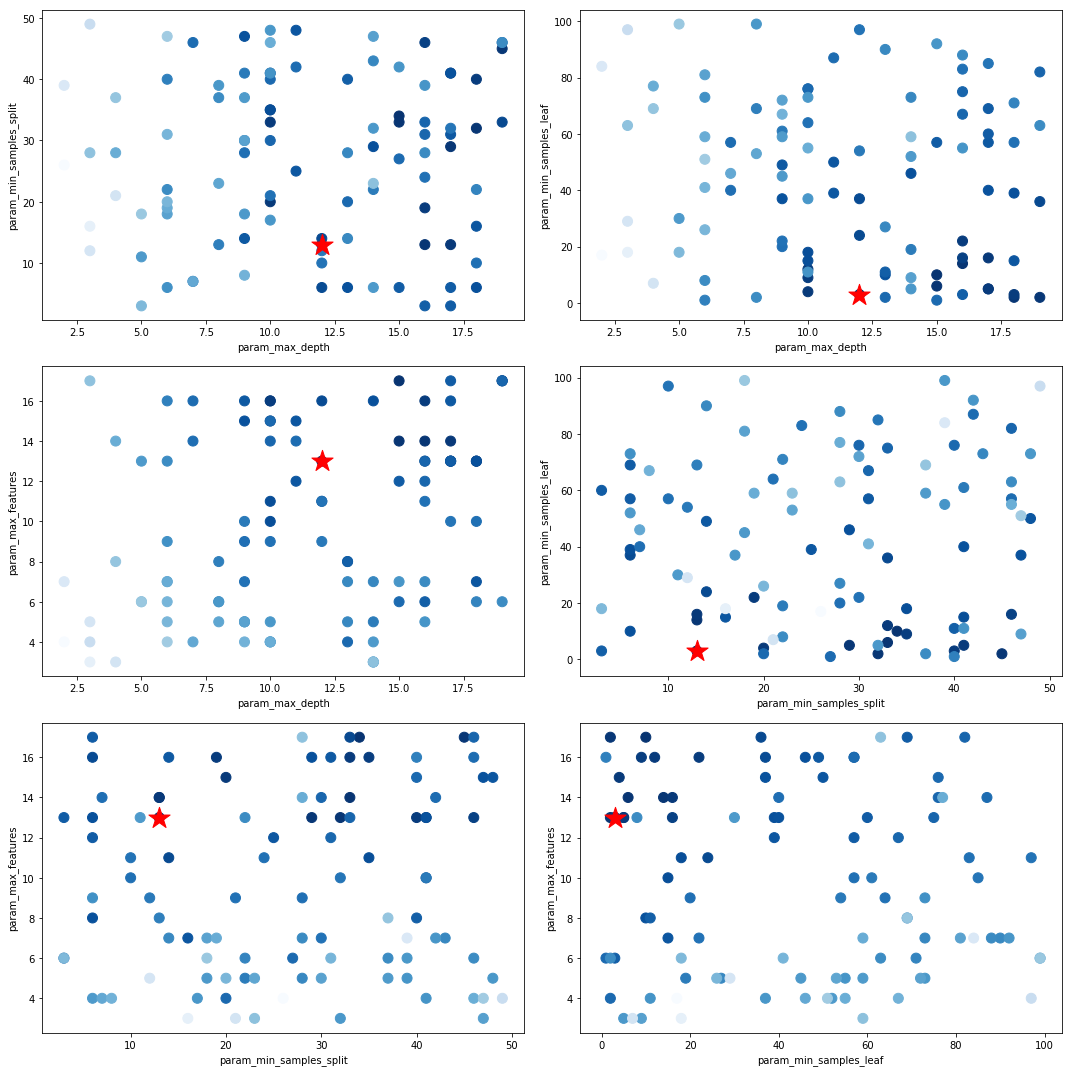

In [9]:
params = ['param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'param_max_features']
gs = gridspec.GridSpec(3,2)
fig = plt.figure(figsize=(15, 15), tight_layout=True)
plt_best = cv_results.head(1)
for idx, params in enumerate(combinations(params, 2)):
    ax = fig.add_subplot(gs[idx])
    plt.scatter(cv_results[params[0]], cv_results[params[1]], c=-np.log(-cv_results['mean_test_score']), s=100, cmap="Blues")
    plt.scatter(plt_best[params[0]], plt_best[params[1]], s=500, marker="*", c="r")
    plt.xlabel(params[0])
    plt.ylabel(params[1])

Inspect feature importance

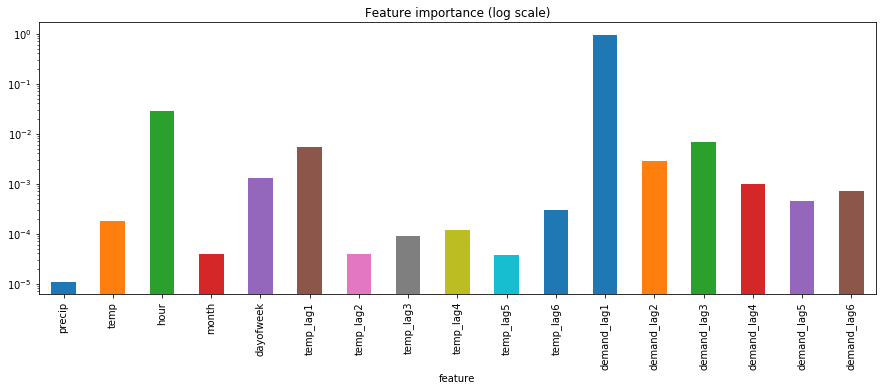

In [13]:
feature_importance = pd.DataFrame.from_dict({'feature':X.columns, 'importance':regr_pipe.named_steps['regr_cv'].best_estimator_.feature_importances_})
feature_importance.plot.bar('feature', 'importance', figsize=(15,5), logy=True, title='Feature importance (log scale)', legend=False)
plt.show()